In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = [15, 5]  # Width, Height in inches

In [2]:
df = pd.read_excel("D:\data science/salaries cleaned.xlsx" , sheet_name="cleaned data")

In [3]:
df = df[['Title', 'Years of Experiences',  'Salary in $',
       'What Is your Company', 'Work Type', 'Work Hour',
       'City of Company site']]

In [4]:
df

,Title,Years of Experiences,Salary in $,What Is your Company,Work Type,Work Hour,City of Company site
0,.Net Developer,5,20.0,Multi-National,Remote,Full-Time,Out Of Egypt
1,.Net Developer,3 - 4,1200.0,Multi-National,Remote,Full-Time,Out Of Egypt
2,.Net Developer,3 - 4,1000.0,Multi-National,Remote,Full-Time,Out Of Egypt
3,.Net Developer,0 - 1,120.0,Egyptian,On Site,Full-Time,Egypt
4,.Net Developer,0 - 1,120.0,Egyptian,Hybrid,Full-Time,Egypt
...,...,...,...,...,...,...,...
436,Web Developer,0 - 1,700.0,Egyptian,Hybrid,Full-Time,Egypt
437,Web Developer,0 - 1,392.4,Multi-National,Remote,Part-Time,Out Of Egypt
438,WordPress Developer,3 - 4,540.0,Egyptian,Hybrid,Full-Time,Egypt
439,WordPress Developer,2 - 3,800.0,Multi-National,Remote,Full-Time,Out Of Egypt


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 441 non-null    object 
 1   Years of Experiences  441 non-null    object 
 2   Salary in $           441 non-null    float64
 3   What Is your Company  441 non-null    object 
 4   Work Type             441 non-null    object 
 5   Work Hour             441 non-null    object 
 6   City of Company site  441 non-null    object 
dtypes: float64(1), object(6)
memory usage: 24.2+ KB


In [6]:
df.describe(include="all")

,Title,Years of Experiences,Salary in $,What Is your Company,Work Type,Work Hour,City of Company site
count,441,441,441.000000,441,441,441,441
unique,66,14,NaN,2,3,2,2
top,.Net Developer,0 - 1,NaN,Egyptian,Hybrid,Full-Time,Egypt
freq,46,183,NaN,266,185,420,360
mean,NaN,NaN,624.986168,NaN,NaN,NaN,NaN
std,NaN,NaN,980.623081,NaN,NaN,NaN,NaN
min,NaN,NaN,20.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,200.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,320.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,600.000000,NaN,NaN,NaN,NaN



Key Insights from the describe function:
----------
----------------
1. Title column majority is .Net Developer
2. Years of Experiences  is  0 to 1 years
3. Most of the companies recorded in the survey are egyptians 
4. most of softeware jobs are hybrid and full time
5. This survey's companies' site are mostly in egypt
6. salary in $ column has high std and that the mean and median isn't near in values
------
The insights above will be illustrated in the next cells
---------


<Axes: xlabel='What Is your Company', ylabel='count'>

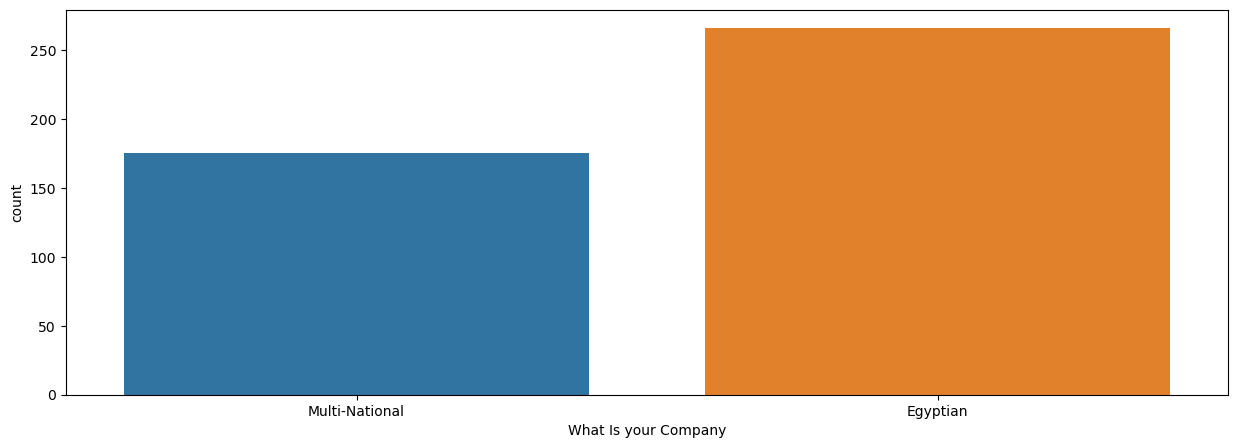

In [7]:
sns.countplot(data = df , x = "What Is your Company")

<Axes: xlabel='Years of Experiences', ylabel='count'>

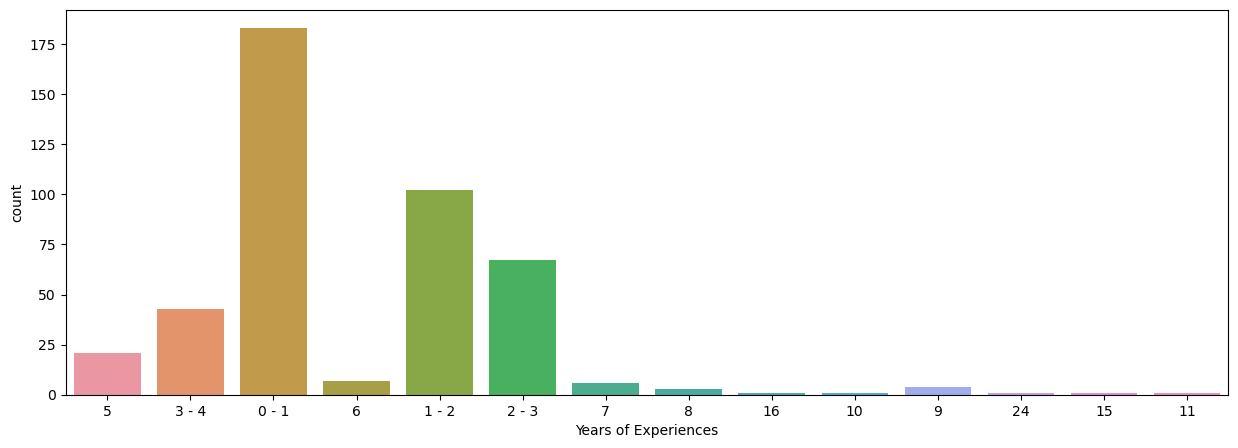

In [8]:
sns.countplot(data = df , x = "Years of Experiences")

Text(0.5, 1.0, 'Count plot of the top 20 Jobs in the dataset')

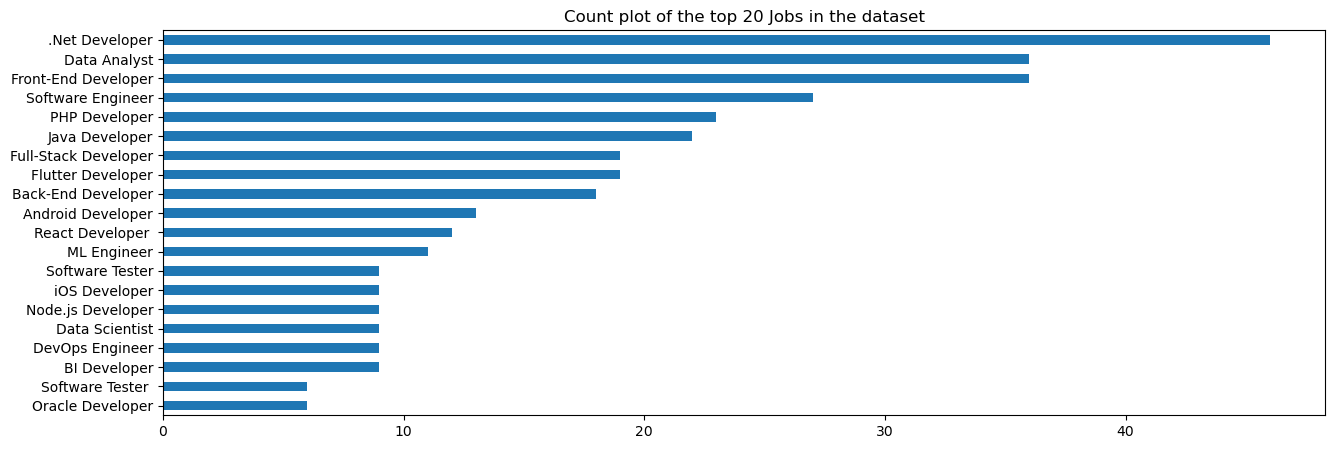

In [9]:
df["Title"].value_counts().sort_values(ascending=True).tail(20).plot(kind = "barh")
plt.title("Count plot of the top 20 Jobs in the dataset")

<Axes: xlabel='Work Type', ylabel='count'>

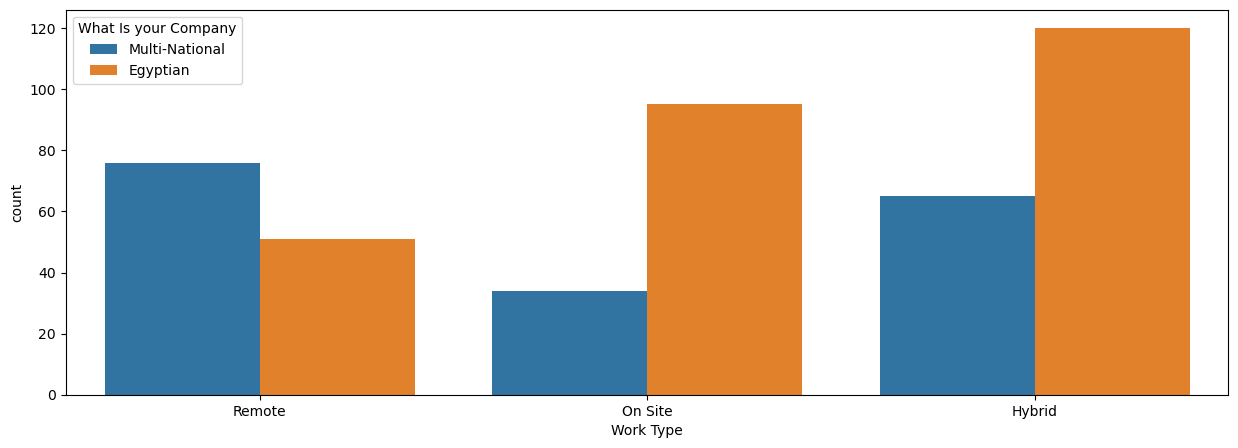

In [10]:
sns.countplot(data = df , x = "Work Type" , hue = "What Is your Company")

1. For Remote Jobs: multi-national companies tend to follow this system more than egyptian companies
-------------
2. For Hybrid and On-Site Jobs Egyptian companies follow this system more than multi national companies
--------

<Axes: xlabel='Work Hour', ylabel='count'>

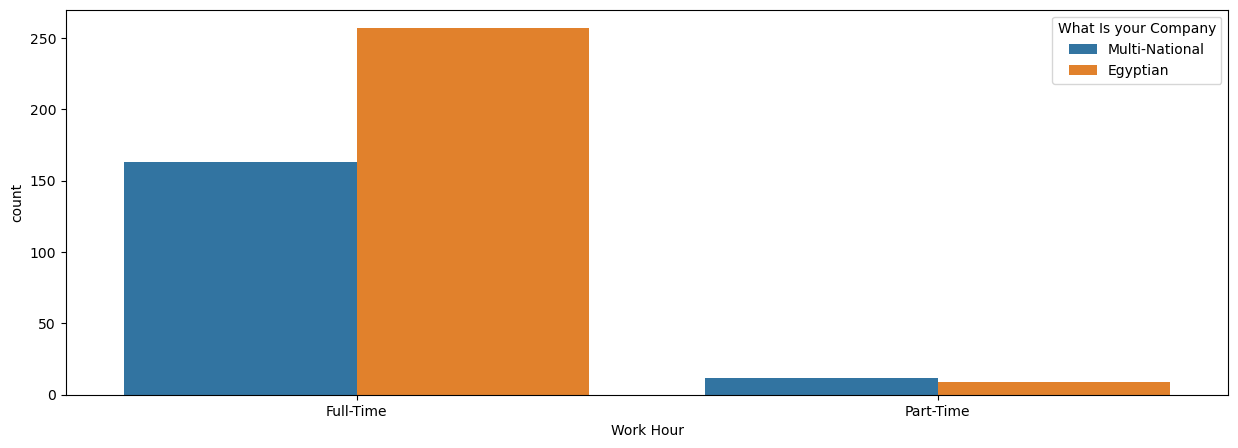

In [11]:
sns.countplot(data = df , x = "Work Hour" , hue = "What Is your Company")

<Axes: xlabel='Work Hour', ylabel='count'>

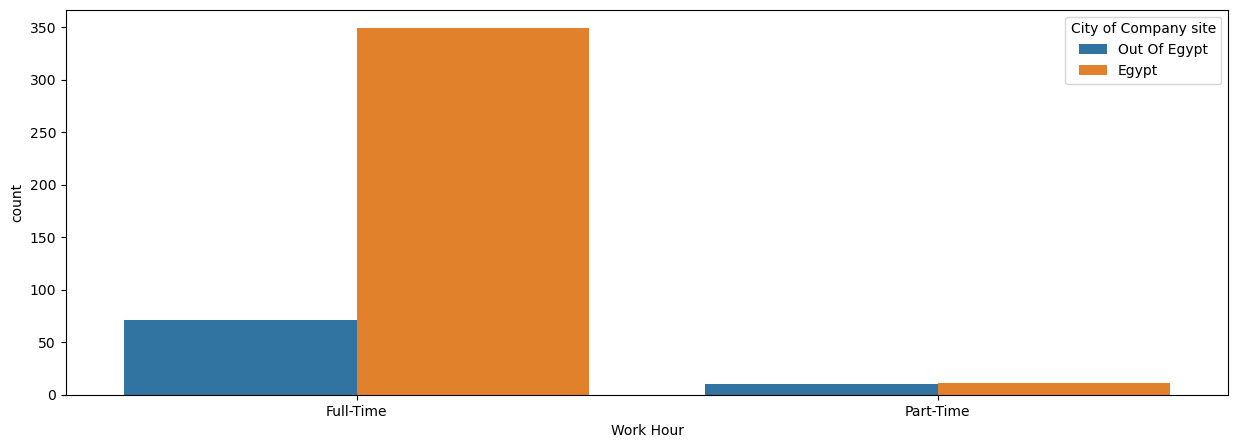

In [12]:
sns.countplot(data = df , x = "Work Hour" , hue = 'City of Company site')

<Axes: xlabel='Work Hour', ylabel='count'>

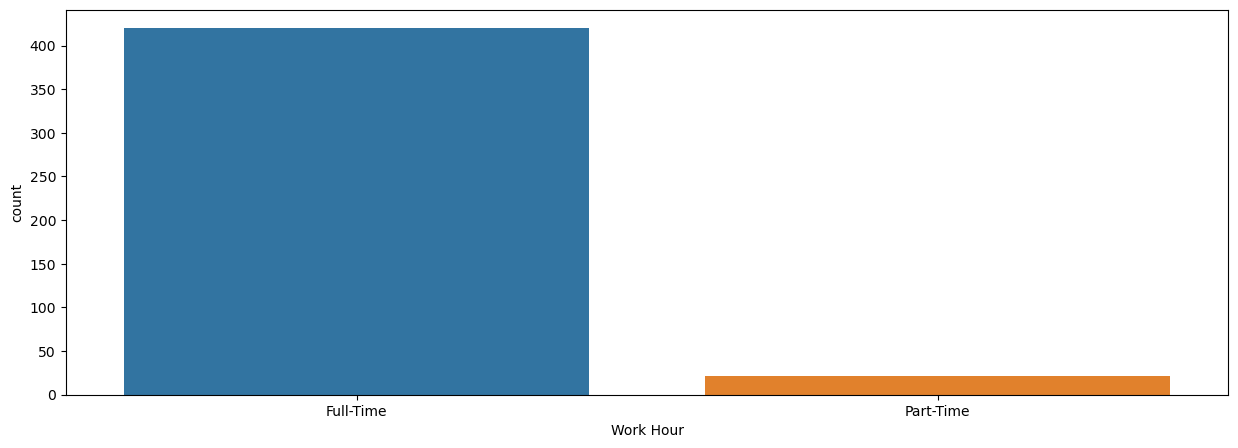

In [13]:
sns.countplot(data = df , x = "Work Hour" )

<Axes: xlabel='City of Company site', ylabel='count'>

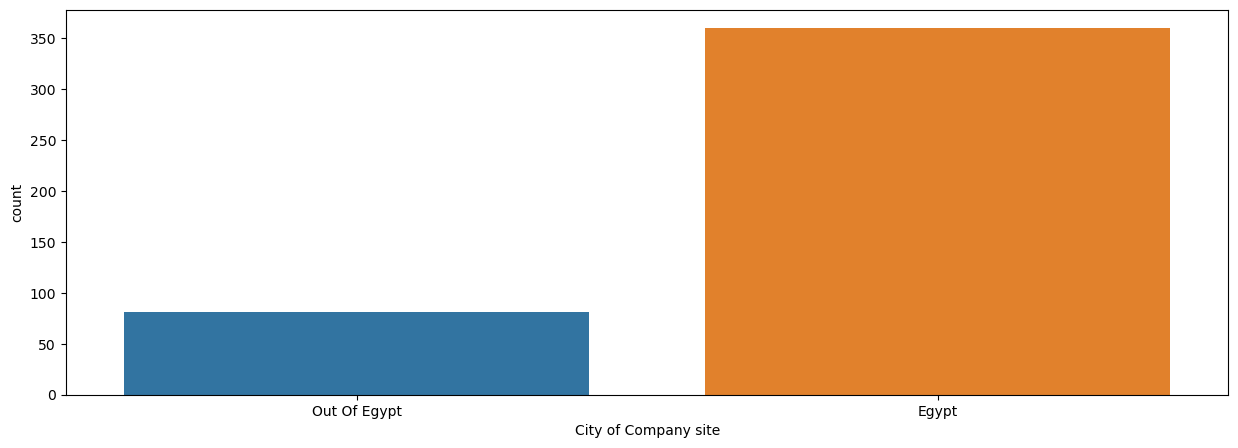

In [14]:
sns.countplot(data = df , x = 'City of Company site' )

Here's the distributions of the salaries based on the type of the company 
------

<Axes: xlabel='Salary in $', ylabel='Count'>

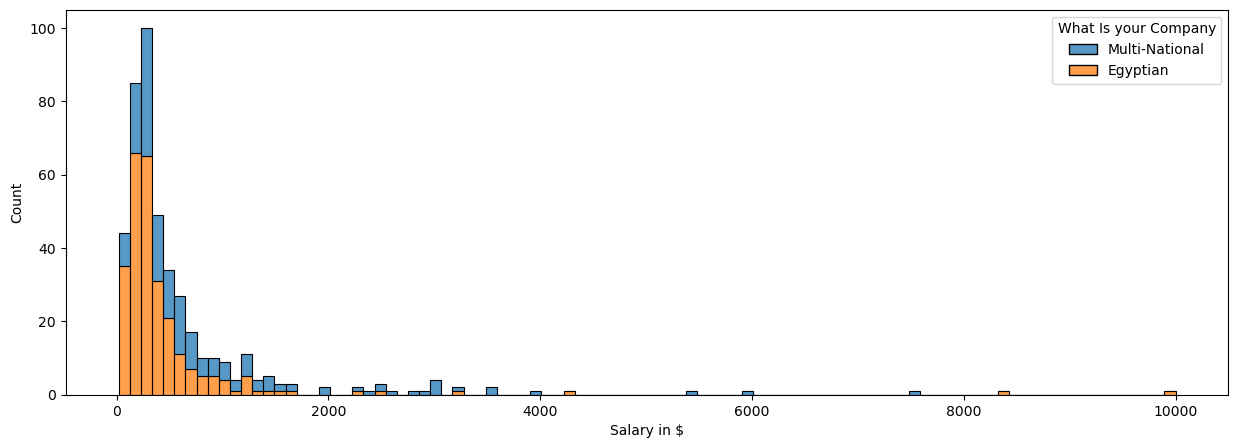

In [15]:
sns.histplot(df, x="Salary in $", hue="What Is your Company" , multiple="stack")

Let's plot the top 20 salaries based on the Jobs
--------

Text(0.5, 1.0, 'Top 20 Jobs monthly salaries in $')

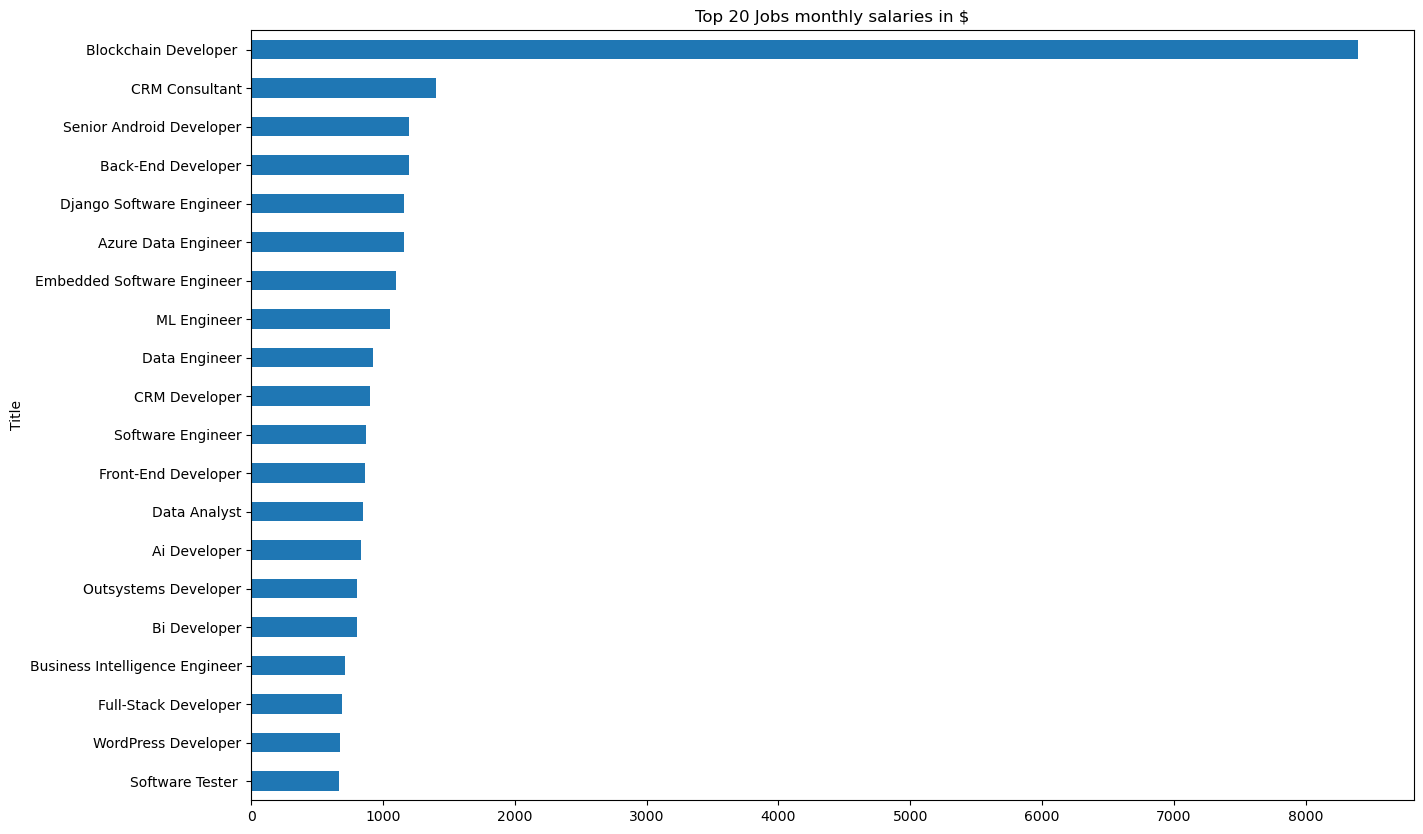

In [16]:
plt.figure(figsize=(15, 10))
df.groupby("Title")["Salary in $"].mean().sort_values(ascending=True).tail(20).plot(kind = "barh")
plt.title("Top 20 Jobs monthly salaries in $")

Now we want to differentiate between companies in Egypt and overseas
------------
------------
The results can be predicted easily without visualizations -_-
------

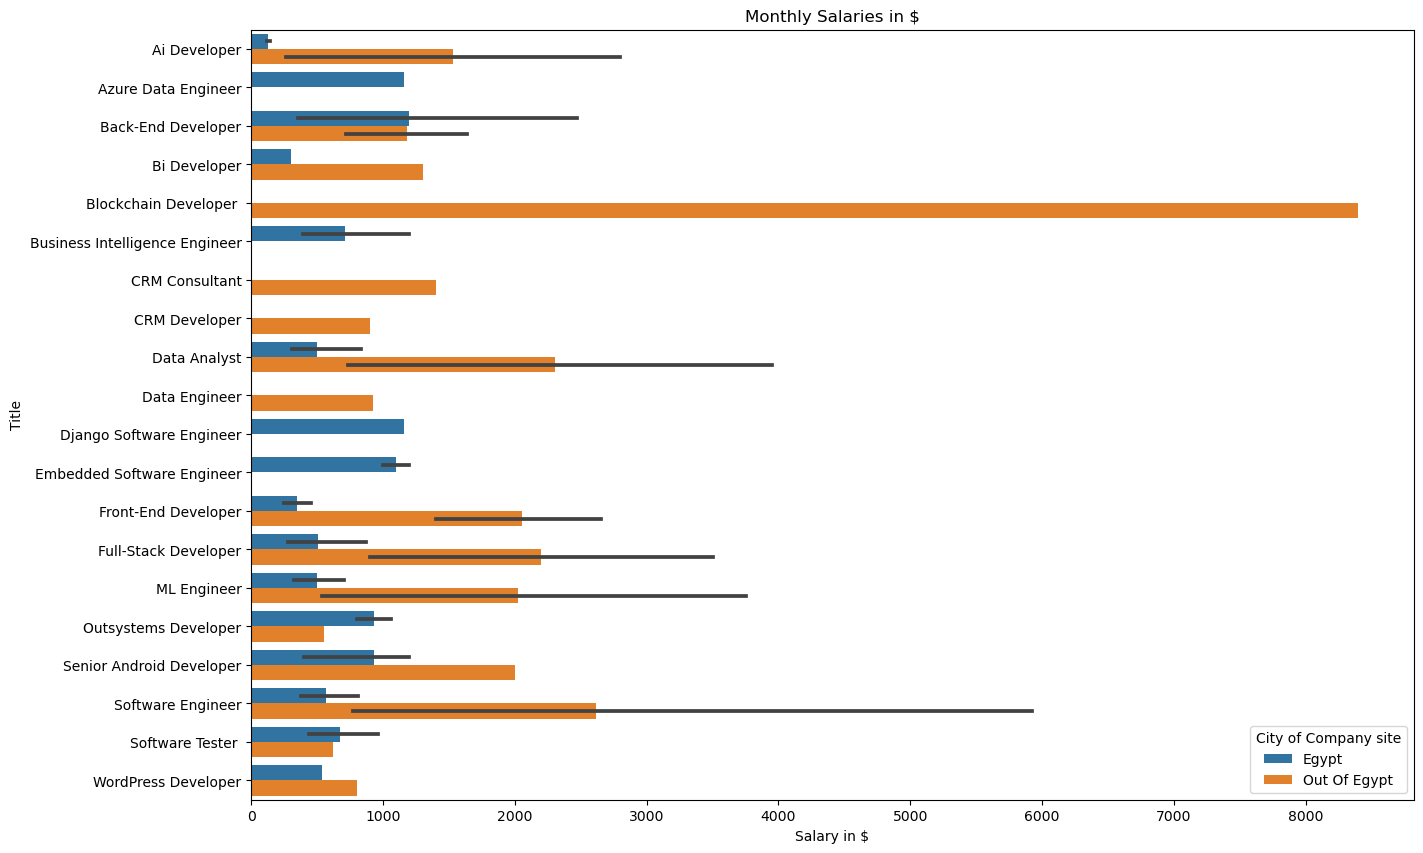

In [17]:
top_titles = df.groupby("Title")["Salary in $"].mean().sort_values(ascending=True).tail(20).index
filtered_df = df[df["Title"].isin(top_titles)]

plt.figure(figsize=(15,10))
sns.barplot(
    data=filtered_df,
    x="Salary in $",
    y="Title",
    hue="City of Company site"
)
plt.title("Monthly Salaries in $")
plt.xlabel("Salary in $")
plt.ylabel("Title")
plt.legend(title="City of Company site")
plt.show()


The error bars indicates high variability in the data for out of egypt results
-----------

Let's See Juniors Salaries in data jobs in Egypt
-------

In [23]:
df[(df["Years of Experiences"] == "0 - 1") & (df["Title"]=="Data Analyst")]

,Title,Years of Experiences,Salary in $,What Is your Company,Work Type,Work Hour,City of Company site
121,Data Analyst,0 - 1,120.0,Egyptian,On Site,Full-Time,Egypt
122,Data Analyst,0 - 1,160.0,Egyptian,On Site,Full-Time,Egypt
126,Data Analyst,0 - 1,750.0,Egyptian,Hybrid,Full-Time,Out Of Egypt
127,Data Analyst,0 - 1,240.0,Egyptian,On Site,Full-Time,Egypt
128,Data Analyst,0 - 1,240.0,Multi-National,Remote,Full-Time,Out Of Egypt
129,Data Analyst,0 - 1,240.0,Egyptian,Hybrid,Full-Time,Egypt
133,Data Analyst,0 - 1,60.0,Egyptian,Hybrid,Part-Time,Egypt
137,Data Analyst,0 - 1,300.0,Egyptian,Hybrid,Full-Time,Egypt
139,Data Analyst,0 - 1,300.0,Egyptian,Remote,Full-Time,Egypt
142,Data Analyst,0 - 1,320.0,Multi-National,On Site,Full-Time,Egypt


In [25]:
df[(df["Years of Experiences"] == "0 - 1") & (df["Title"]=="Data Scientist")]

,Title,Years of Experiences,Salary in $,What Is your Company,Work Type,Work Hour,City of Company site
159,Data Scientist,0 - 1,140.0,Egyptian,Hybrid,Full-Time,Egypt
160,Data Scientist,0 - 1,200.0,Egyptian,Remote,Full-Time,Egypt
161,Data Scientist,0 - 1,60.0,Egyptian,Hybrid,Part-Time,Egypt
162,Data Scientist,0 - 1,320.0,Multi-National,Hybrid,Full-Time,Egypt
165,Data Scientist,0 - 1,440.0,Egyptian,Hybrid,Full-Time,Egypt
167,Data Scientist,0 - 1,600.0,Egyptian,Hybrid,Full-Time,Egypt


In [24]:
df[(df["Years of Experiences"] == "0 - 1") & (df["Title"]=="ML Engineer")]

,Title,Years of Experiences,Salary in $,What Is your Company,Work Type,Work Hour,City of Company site
301,ML Engineer,0 - 1,160.0,Egyptian,On Site,Full-Time,Egypt
302,ML Engineer,0 - 1,240.0,Egyptian,Remote,Full-Time,Egypt
305,ML Engineer,0 - 1,1000.0,Egyptian,Remote,Full-Time,Egypt
308,ML Engineer,0 - 1,1000.0,Multi-National,Remote,Part-Time,Out Of Egypt
309,ML Engineer,0 - 1,460.0,Egyptian,On Site,Full-Time,Egypt
310,ML Engineer,0 - 1,540.0,Multi-National,Hybrid,Full-Time,Egypt
